In [1]:
import posixpath
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.parser import Genbank
from pygenomeviz.align import MMseqs
from pygenomeviz.utils import load_example_gff_file
from pathlib import Path

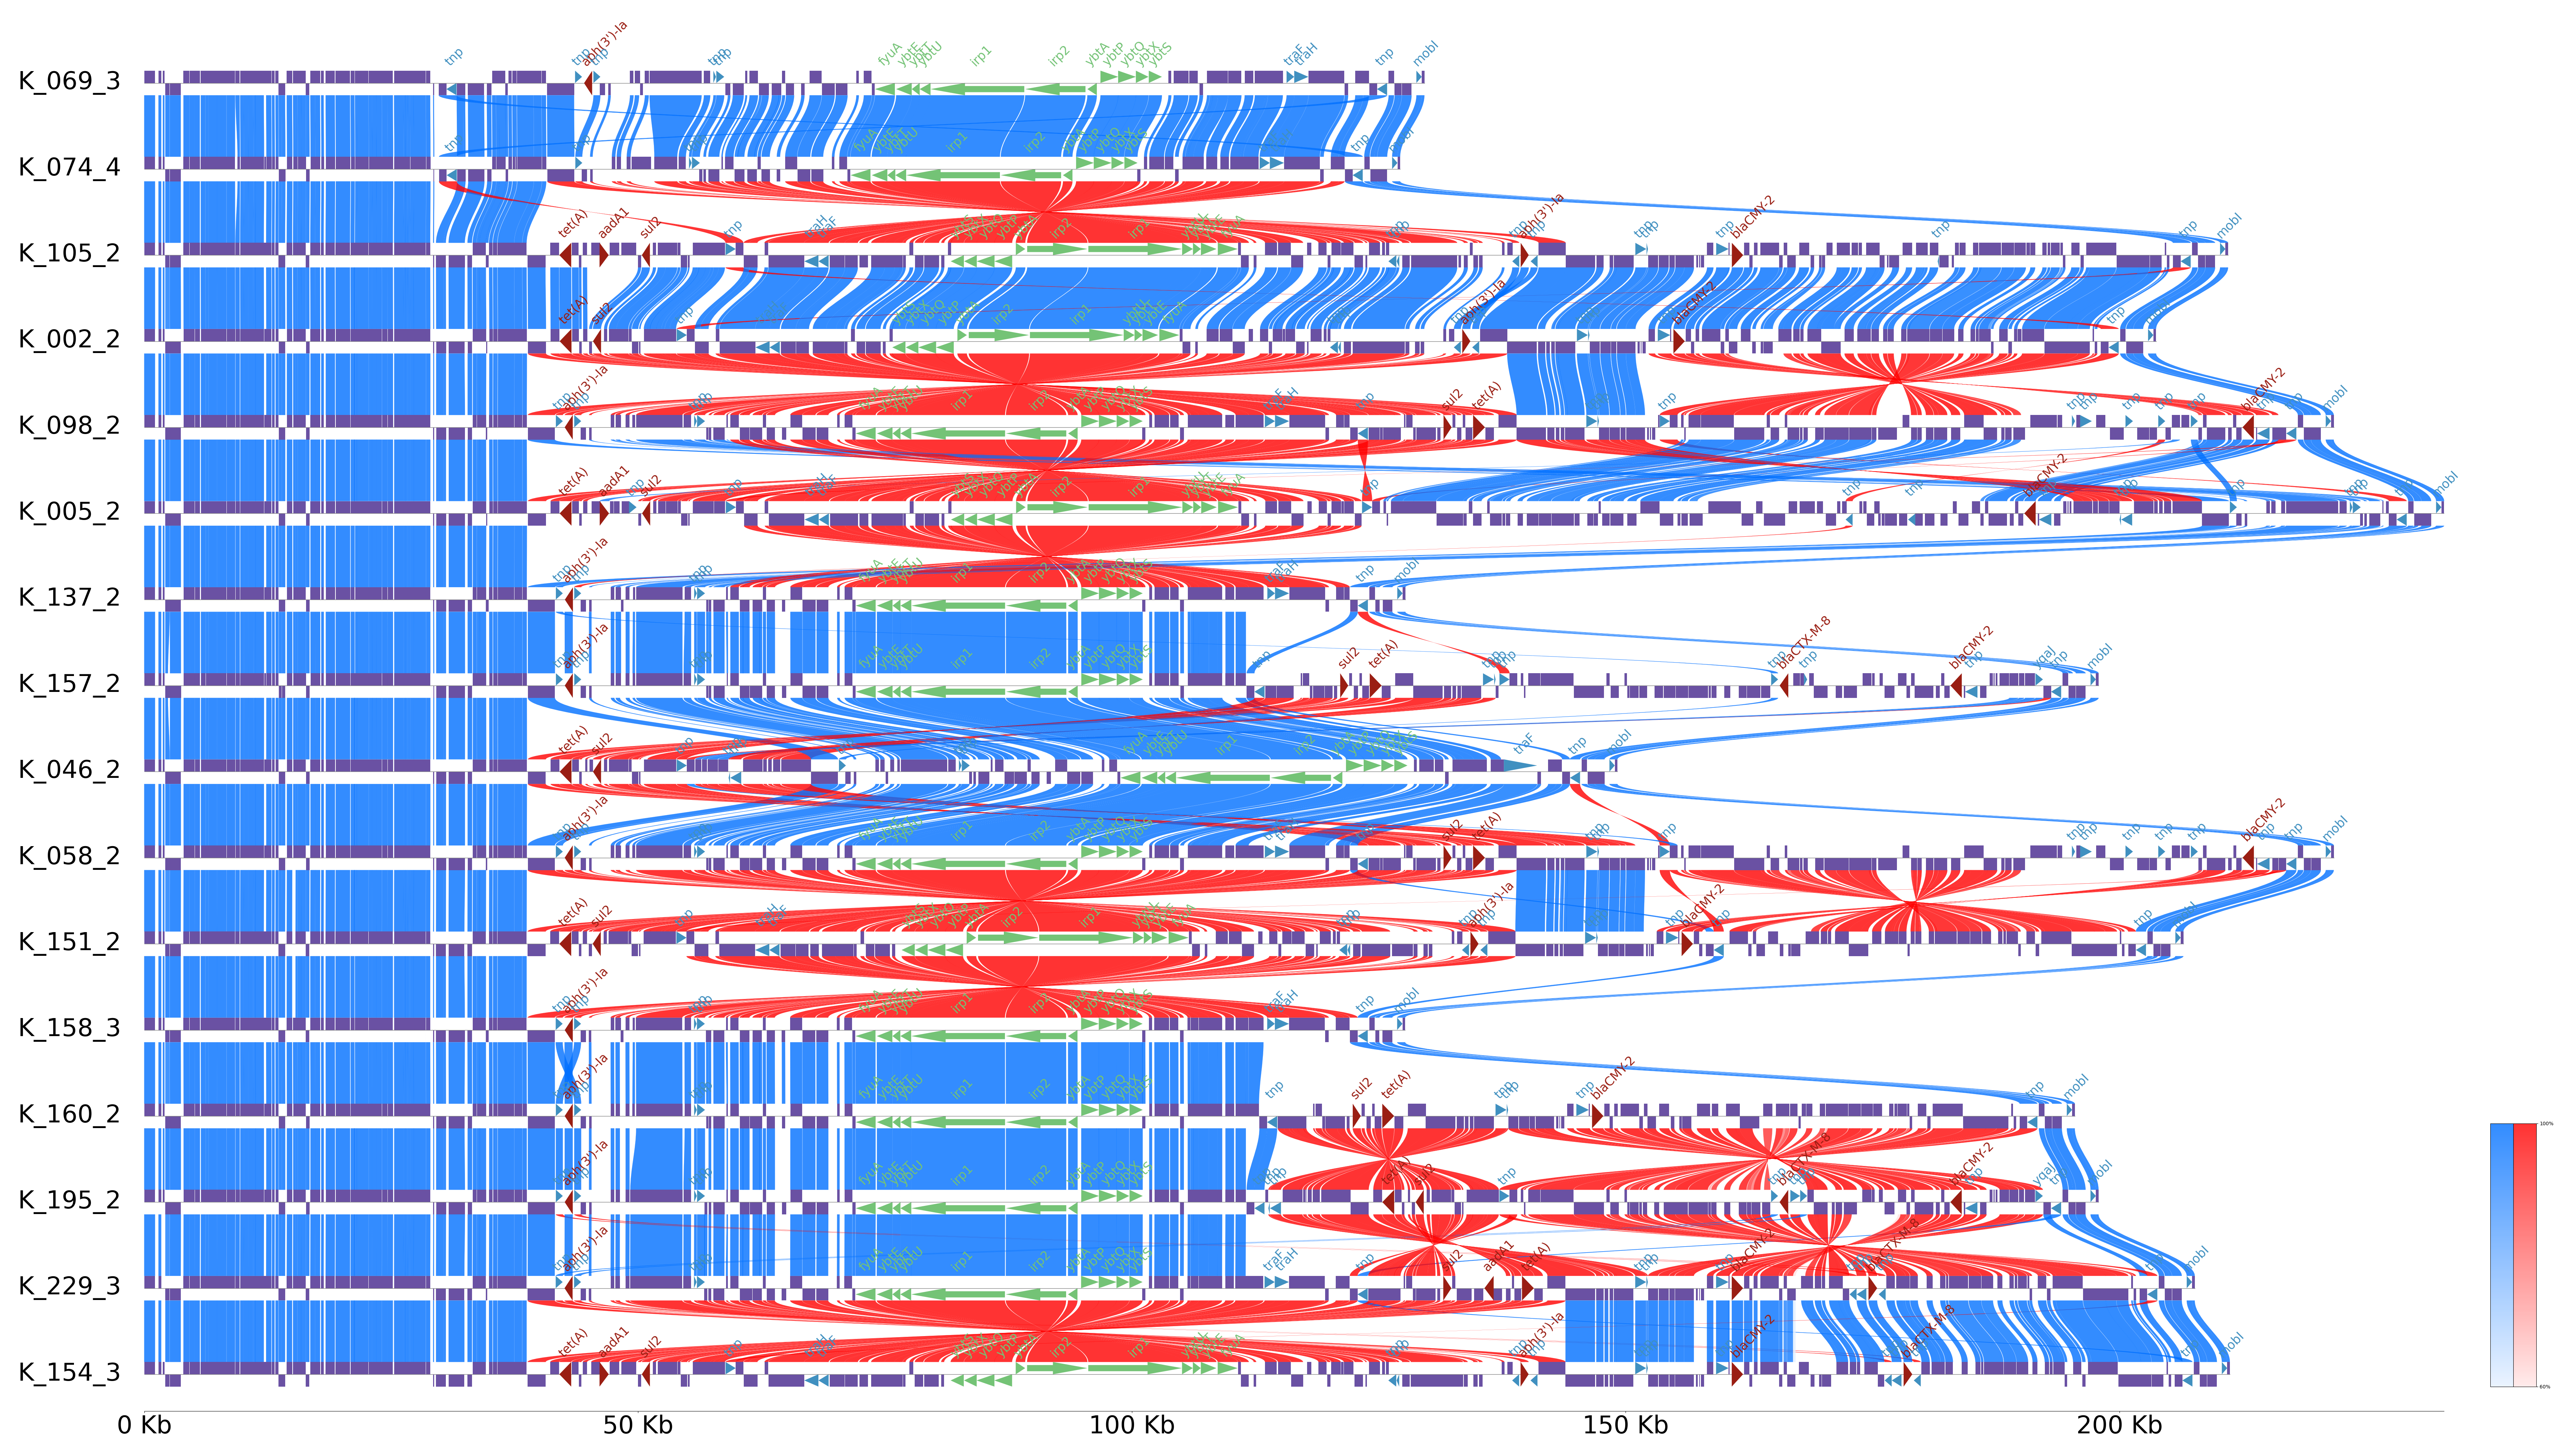

In [2]:
gbk_file = ["./K_069_3.gbff","./K_074_4.gbff","./K_105_2.gbff","./K_002_2.gbff",
            "./K_098_2.gbff","./K_005_2.gbff","./K_137_2.gbff", "./K_157_2.gbff",
            "./K_046_2.gbff","./K_058_2.gbff","./K_151_2.gbff","./K_158_3.gbff",
            "./K_160_2.gbff","./K_195_2.gbff","./K_229_3.gbff","./K_154_3.gbff"]
gbk_path = [Path(path) for path in gbk_file]
gbk_list = list(map(Genbank, gbk_path))

gv = GenomeViz(fig_track_height=1.2, feature_track_ratio=0.4, fig_width=65)
gv.set_scale_xticks(labelsize=50)

# Plot CDS features
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False,labelsize=50)
    for seqid, features in gbk.get_seqid2features("CDS").items():
        segment = track.get_segment(seqid)
        for feature in features:
            gene_name = str(feature.qualifiers.get("gene", [""])[0])
    # Set user-defined feature color based on gene name
            if gene_name.startswith("ybt"):
                color = "#74C376"
                segment.add_features(feature, plotstyle="arrow", color=color, label_type="gene",text_kws=dict(size=25, color=color))
            elif gene_name in ("irp1", "irp2", "fyuA"):
                color = "#74C376"
                segment.add_features(feature, plotstyle="arrow", color=color, label_type="gene",text_kws=dict(size=25, color=color))
            elif gene_name in ("tet(A)", "sul2", "blaCMY-2", "blaCTX-M-8", "aph(3')-Ia", "aadA1"):
                color = "#9A1E13"
                segment.add_features(feature, plotstyle="bigarrow", color=color, label_type="gene",text_kws=dict(size=25, color=color))
            elif gene_name in ("traF", "traH", "tnp", "yqaJ","mobI"):
                color = "#4090C0"
                segment.add_features(feature, plotstyle="arrow", color=color, label_type="gene",text_kws=dict(size=25, color=color))
            elif gene_name.startswith("IS"):
                color = "#4090C0"
                segment.add_features(feature, plotstyle="arrow", color=color, label_type="gene",text_kws=dict(size=25, color=color))
            else:
                color = "#6A51A3"
                segment.add_features(feature, plotstyle="box", color=color)

# Run MMseqs RBH search
align_coords = MMseqs(gbk_list).run()

# Plot MMseqs RBH search links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "#0070FF", "red"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident, curve=True)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()


In [3]:
gv.savefig(savefile="./plot.jpg",dpi=300)